In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from splice.splice import SPLICE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
data = np.load(
        r"C:\Users\Harris_Lab\Projects\SPLICE\data\mnist\mnist_rotated_shared-digit_missing.npz"
    )

# X = torch.Tensor(data["view1"][:50000]).to(device)
# Y = torch.Tensor(data["view2"][:50000]).to(device)
# X_val = torch.Tensor(data["view1"][50000:60000]).to(device)
# Y_val = torch.Tensor(data["view2"][50000:60000]).to(device)
a_test = torch.Tensor(data["view1"][60000:]).to(device)
b_test = torch.Tensor(data["view2"][60000:]).to(device)
angles_test = data["angles"][60000:]
labels_test = data["labels"][60000:]

In [3]:
model = SPLICE(
        n_a=784,
        n_b=784,
        n_shared=30,
        n_private_a=0,
        n_private_b=2,
        enc_layers=[256, 128, 64, 30 + 30],
        dec_layers=[30 + 30, 64, 128, 256],
        msr_layers=[30 + 30, 64, 128, 256],
    ).to(device)

In [37]:
isomap1_filepath = os.path.join(
        "..",
        "results",
        "models",
        "mnist",
        "splice_isomap_mnist_missing-rotations-fix3.pt",
    )
model.load_state_dict(torch.load(isomap1_filepath))

<All keys matched successfully>

In [38]:
z_a, z_b2a, z_a2b, z_b, m_a2b, m_b2a, a_hat, b_hat = model(a_test, b_test)
z_b = z_b.detach().cpu().numpy()

In [40]:
torch.nn.functional.mse_loss(b_test, b_hat)

tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>)

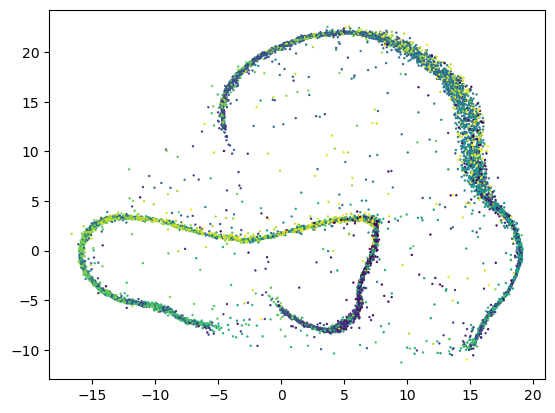

In [41]:
plt.scatter(z_b[:,0], z_b[:,1], c=angles_test, s=0.5)